# Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to the CSV file
file_path = "/Users/sjtok/ece684/dataset/Suicide_Ideation_Dataset(Twitter-based).csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [3]:
# Check the data types of all columns
print(df.dtypes)

Tweet      object
Suicide    object
dtype: object


In [4]:
df.head(10)

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
5,"@ValenValdez Oh, that's good to hear. But is i...",Not Suicide post
6,@mcm180 u've got a list for fellow #hotties? Y...,Not Suicide post
7,@jakepaul @jamescharles @LoganPaul Just becaus...,Potential Suicide post
8,time for some warsaw beer garden chilling,Not Suicide post
9,I hate my life lmao I hope I die soon or sumn ...,Potential Suicide post


# Data Preprocessing

In [5]:
# Check missing values
df.isnull().sum()

Tweet      2
Suicide    0
dtype: int64

In [6]:
# Drop rows with missing values
df = df.dropna(subset=['Tweet'])

In [7]:
# Converting the Suicide column to categorical type
df['Suicide'] = df['Suicide'].astype('category')

In [8]:
# Filter out rows where the tweet contains one word or less
one_word_or_less = df[df['Tweet'].str.split().str.len() <= 1].shape[0]
print(f"Number of rows with 1 word or less: {one_word_or_less}")

df = df[df['Tweet'].str.split().str.len() > 1]

Number of rows with 1 word or less: 5


# Exploratory Data Analysis

In [9]:
# Check class balance
class_counts = df['Suicide'].value_counts()
print(class_counts)

Suicide
Not Suicide post           1121
Potential Suicide post      659
Name: count, dtype: int64


In [18]:
# Check if data contains emojis or special characters

# Function to check if a tweet contains emojis
def contains_emoji(tweet):
    # Emoji Unicode ranges
    emoji_pattern = re.compile(
        "[\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alchemical Symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Symbols and Pictographs
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols for Legacy Computing
        "\U00002702-\U000027B0"  # Miscellaneous Symbols
        "\U000024C2-\U0001F251"  # Enclosed Characters
        "]+", re.UNICODE)
    return bool(emoji_pattern.search(tweet))  # Return True if emoji found, False otherwise

# Function to check if a tweet contains special characters
def contains_special_characters(tweet):
    # Regex pattern to match non-alphanumeric characters (special characters)
    pattern = re.compile('[^A-Za-z0-9\s]', re.UNICODE)
    return bool(pattern.search(tweet))  # Return True if special character is found, False otherwise


df['Contains_Emoji'] = df['Tweet'].apply(contains_emoji)
emoji_count = df['Contains_Emoji'].sum()
df['Contains_Special_Characters'] = df['Tweet'].apply(contains_special_characters)
special_char_count = df['Contains_Special_Characters'].sum()

# Display the counts
print(f"Number of tweets containing emojis: {emoji_count}")
print(f"Number of tweets containing special characters: {special_char_count}")

Number of tweets containing emojis: 0
Number of tweets containing special characters: 1548


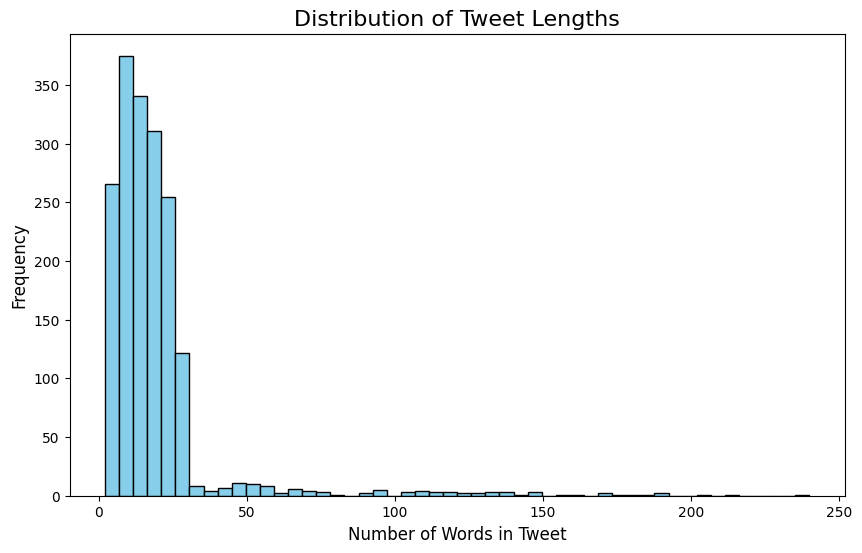

In [10]:
# Check distribution of tweet lengths
df['Tweet'] = df['Tweet'].astype(str)
df['Length'] = df['Tweet'].apply(lambda x: len(x.split()))

# Draw histogram
plt.figure(figsize=(10, 6)) 
plt.hist(df['Length'], bins=50, edgecolor='black', color='skyblue')
plt.title('Distribution of Tweet Lengths', fontsize=16)
plt.xlabel('Number of Words in Tweet', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [11]:
from wordcloud import WordCloud

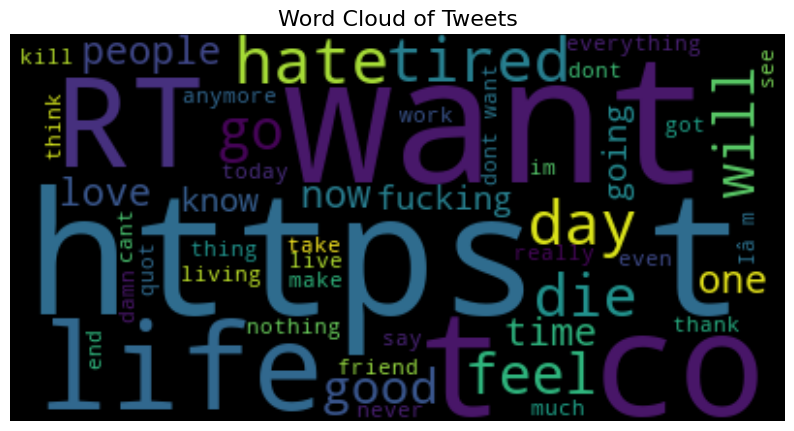

In [12]:
# Visualize Word Cloud of Tweets with top 50 words

from wordcloud import WordCloud
wordcloud = WordCloud(colormap='viridis',
                      background_color='black',
                      max_words=50
                      ).generate(' '.join(df['Tweet']))


plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smoother display
plt.axis('off')
plt.title('Word Cloud of Tweets', fontsize=16)
plt.show()

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/sjtok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Quantify proportion of stop words in data

stop_words = set(stopwords.words('english'))
print(stop_words) # Check what words are considered stop words

def stopword_proportion(tweet):
    words = tweet.split()
    stopwords_in_tweet = [word for word in words if word.lower() in stop_words]
    return len(stopwords_in_tweet) / len(words) if len(words) > 0 else 0

df['Stopword_Proportion'] = df['Tweet'].apply(stopword_proportion)

# Calculate the overall proportion of stopwords in the dataset
overall_stopword_proportion = df['Stopword_Proportion'].mean()

print(f"Overall proportion of stopwords in the dataset: {overall_stopword_proportion:.4f}")

{'how', 'no', 'them', 'because', 'yourselves', 'too', 'am', 'my', 'both', 'is', "couldn't", 'until', 'themselves', 'wasn', 'from', 'other', 'up', 'mightn', 'have', 'each', 'has', 'mustn', 'off', 'if', 'own', 'now', 'which', "shan't", "haven't", 'we', 'again', 'here', 'needn', 'through', "you'll", 'while', 'so', "isn't", 'did', 'should', 'ourselves', 'had', 'hers', "needn't", 'some', 'him', "aren't", 'doing', 'the', 'his', 'your', 'as', 'down', "mustn't", 'himself', 'why', 'wouldn', 'isn', "won't", 'very', 'most', 'who', 'to', 'be', 'nor', 'such', 're', 'will', 'during', 'on', 'those', 'haven', 'only', 'o', 'she', 'aren', 'itself', 'didn', 'weren', "don't", 'does', 'that', 'they', 'an', 'and', 'not', 'about', 'at', 'll', 'or', 'hasn', 'herself', 'couldn', 'into', 'between', "wasn't", 'before', 'doesn', 'our', 'myself', 'having', 'being', 'were', "you're", 'by', 'theirs', 'there', "didn't", 'ma', 'y', 'but', 'few', 'd', "hadn't", 'just', 'm', 'out', 'me', 'been', 'this', 'won', 'when', "

In [ ]:
print(df.head())

In [13]:
from collections import Counter
import re

In [15]:
# Check 20 most frequent words in each class

def tokenize_text(text):
    # Remove any non-alphanumeric characters (this can be adjusted)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text.lower())
    return text.split()

# Separate the dataset by class
not_suicide_df = df[df['Suicide'] == 'Not Suicide post']
potential_suicide_df = df[df['Suicide'] == 'Potential Suicide post']

# Function to get the top 20 words for a class
def get_20_words_from_counter(dataframe):
    # Tokenize each tweet and flatten the list of tokens
    all_words = [word for tweet in dataframe['Tweet'] for word in tokenize_text(tweet)]
    
    # Count the frequency of each word
    word_counts = Counter(all_words)
    
    # Return the 20 most common words
    return word_counts.most_common(20)

# Get the top 20 words for each class
not_suicide_top_words = get_20_words_from_counter(not_suicide_df)
potential_suicide_top_words = get_20_words_from_counter(potential_suicide_df)

# Display the top 20 words for each class
print("Top 20 words for 'Not Suicide post':")
print(not_suicide_top_words)
print("\nTop 20 words for 'Potential Suicide post':")
print(potential_suicide_top_words)


ValueError: empty vocabulary; perhaps the documents only contain stop words

# Export CSV